In [219]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [190]:
class NArmedBandit:
    def __init__(self, n=10, epsilon=0):
        self.n = n
        self.epsilon = epsilon
        self.action_values = np.random.normal(loc=0.0, scale=1.0, size=n)
        self.actions = []
        self.rewards = []

    def take_action(self):
        if self.epsilon > random.uniform(0, 1):
            estimated_action_values = [estimated_value(action) for action in range(self.n)]

            max_value = np.max(estimated_action_values)
            ties = np.where(values == max_value)[0]
            random_argmax = np.random.choice(ties)
            selected_action = random_argmax
        else:
            selected_action = np.random.choice(range(self.n))

        reward = self.reward(selected_action)

        self.actions.append(selected_action)
        self.rewards.append(reward)

        return selected_action, reward

    def optimal_action(self):
        return np.argmax(self.action_values)

    def estimated_value(self, action):
        if self.N(action) == 0:
            return 0
        else:
            previous_occurences = np.array(self.actions) == action
            sum_previous_rewards = np.array(self.rewards)[previous_occurences].sum()
            return sum_previous_rewards / self.N(action)

    def N(self, action):
        return self.actions.count(action)

    def reward(self, action):
        return self.action_values[action] + np.random.normal(loc=0.0, scale=1.0)


In [191]:
bandit = NArmedBandit()


In [208]:
bandits = [NArmedBandit() for _ in range(2000)]

In [209]:
reward_matrix = np.zeros((2000, 1000))
optimal_action_matrix = np.zeros((2000, 1000))

for bandit_index, bandit in enumerate(bandits):
    for step in range(1000):
        action, reward = bandit.take_action()
        reward_matrix[bandit_index, step] = reward
        optimal_action_matrix[bandit_index, step] = (1 if action == bandit.optimal_action() else 0)

In [215]:
column_averages = np.mean(reward_matrix, axis=0)
column_averages.shape

(1000,)

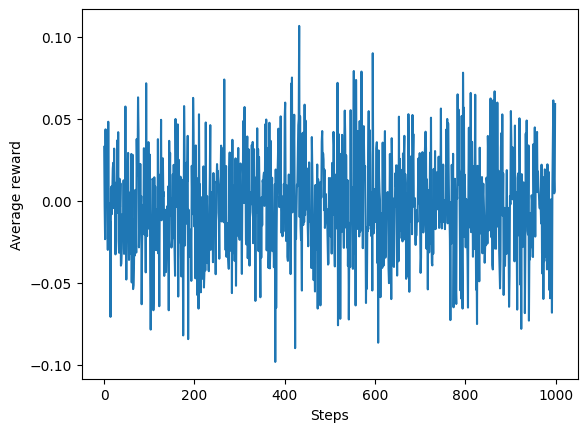

In [221]:
plt.plot(column_averages)
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.grid(False)
plt.show()